# Data Science Machine Learning

## Lecture: *Multivariate Technique for Exploratory Data Analysis*

### Your Mentor: *Munyala Eliud* ( or call me Luda 😎)

## Prerequisite:

* Basic programming knowledge (preferrably python)
* Basic data knowledge (data types)
* Basic knowledge on popular graph types include line graphs, bar graphs, pie charts, scatter plots and histograms.
* Keen interest to learn something new 😸

# Exploratory Data Analysis

*As we have discussed earlier EDA is part and parcel of Data Analysis*


## Good Data Analysis TODO process



### A. Business understanding | Defining our question

> A Wine Company has hired you a Data Scientist,to determine the quality of its red wine based on several characteristics.

> They give you a dataset with multiple charachteristics,for the purpose of this lecture see if you can reduce first standardize the data and reduce columns using mutlivariate techniques like PCA.

### B. Defining metrics of success.
    - Cleaned our dataset 
    - Separated our data into train test split
    - Used a standardized scale on our data
    - Successfully used PCA to

### C. Load data 


### LET THE DATA GAMES BEGIN ⛹

> Data comes in different forms i.e *csv | excel | txt | json*

[Link to Kaggle Data Source](https://www.kaggle.com/datasets/dell4010/wine-dataset?resource=download) 😉

In [74]:
# load usefull libraries first

# Data loading and manipulation
import pandas as pd
import numpy as np

# basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizinf the data and condcting pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# split data into train and test split
from sklearn.model_selection import train_test_split

# figures inline in notebook
%matplotlib inline

In [75]:
data_path = '/content/wine_dataset.csv'


# Pandas loads data in form of dataframes 
# ps there are other forms like in R with Tables 
df_wine = pd.read_csv(data_path)


### D. Previewing the data


> Dont fear getting into the mud, jump in and understand your messy data 🥶


#### In a nutshell this includes 
    - View shape of the dataset
    - View head | tail of the data (top and bottom 5)
    - View data types ( int | string | Float)
    - View empy set ( Null values | NaN values)
    - View duplicates ... and many more

In [76]:
# view shape of the loaded dataset
df_wine.shape

(6497, 13)

In [77]:
# view head of dataset
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [78]:
# view tail of the dataset
df_wine.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [79]:
# view datatypes of the dataset
df_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object

In [80]:
# check null values
df_wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [81]:
## ---------- mini report
## 1. The style column might need to be converted to string then maybe to red=1 and white=0
## 2. There are no null values hence no need to clean much
##



### E. Cleaning the data (if necessary)
    - Manipulate empty set (remove | fill with *mean/mode/midean/most occuring*)
    - Clean stings 
    - Manipulate emp

In [82]:
# Clean convert style datatypes to string
df_wine['style'] = df_wine['style'].astype('string')

In [83]:
# confirm datatypes
df_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    string
dtype: object

In [84]:
# confirm head
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [85]:
# convert string to int

# lets confirm values we want to replace
df_wine['style'].unique()

<StringArray>
['red', 'white']
Length: 2, dtype: string

In [86]:
# To convert a sting to an int there are multiple of ways
# you can:
### 1. Replace a string to its replacement value
### 2. Get dummies of said string
 

In [87]:
# ### 3. Replace values### 3. Replace valuesmap
df_wine['style'] = df_wine['style'].replace('red', '0')
df_wine['style'] = df_wine['style'].replace('white', '1')

In [88]:
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [89]:
# check dtypes
df_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    string
dtype: object

In [90]:
# convert to int
df_wine['style'] = df_wine['style'].astype('int')

In [91]:
df_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                     int64
dtype: object

# Solution implimentation

## *Principle Component Analysis:*
    - Split dataset into train test splits on a 80/20 % rull 80
    - Reduce principle components



#### Lets visualize a correlation table matrix and map
'''
A correlation matrix is simply a table which displays the correlation coefficients for different variables. 
The matrix depicts the correlation between all the possible pairs of values in a table. 
It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.
'''

[src_ref](https://corporatefinanceinstitute.com/resources/excel/study/correlation-matrix/)

In [92]:
df_wine.corr() # this is a truncated corrilation table

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


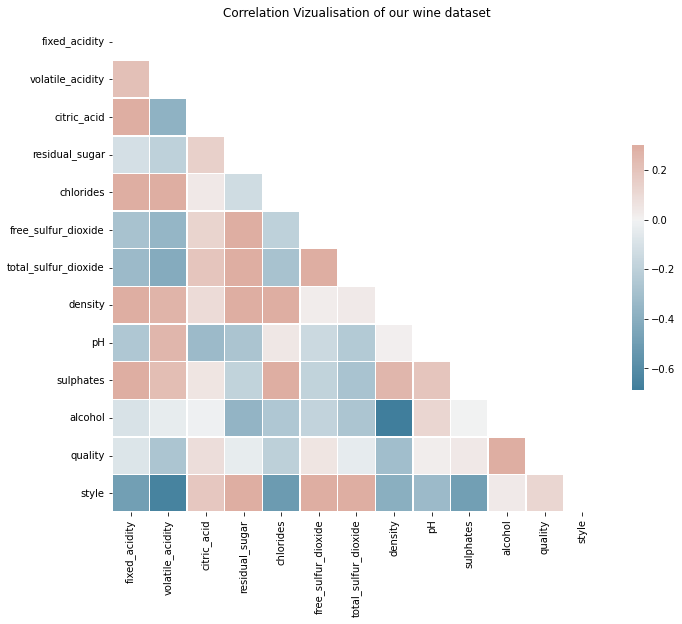

In [93]:
# visualized correlation map

### [src_Ref](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

# Compute the correlation matrix
corr = df_wine.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.title("Correlation Vizualisation of our wine dataset")
plt.show()

In [94]:
# Distribution of labels(y) and features(x)


# distributing the dataset into two components X and Y
X = df_wine.iloc[:,:-1].values
y = df_wine.iloc[:,-1].values

In [95]:
# confirm
print(X[:2])
print(X[:-2])
print('\n')
print(y[:2])

[[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
   0.56    9.4     5.    ]
 [ 7.8     0.88    0.      2.6     0.098  25.     67.      0.9968  3.2
   0.68    9.8     5.    ]]
[[ 7.4   0.7   0.   ...  0.56  9.4   5.  ]
 [ 7.8   0.88  0.   ...  0.68  9.8   5.  ]
 [ 7.8   0.76  0.04 ...  0.65  9.8   5.  ]
 ...
 [ 6.2   0.21  0.29 ...  0.5  11.2   6.  ]
 [ 6.6   0.32  0.36 ...  0.46  9.6   5.  ]
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]]


[0 0]


In [96]:
# Splitting our data 80/20 rule 
## But you can use any percentage you like 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [100]:
print(X_train[:2])
print('\n')
print(y_test[:2])

[[5.000e+00 6.100e-01 1.200e-01 1.300e+00 9.000e-03 6.500e+01 1.000e+02
  9.874e-01 3.260e+00 3.700e-01 1.350e+01 5.000e+00]
 [6.800e+00 2.800e-01 4.000e-01 2.200e+01 4.800e-02 4.800e+01 1.670e+02
  1.001e+00 2.930e+00 5.000e-01 8.700e+00 5.000e+00]]


[1 1]


In [ ]:
# Stangardize our dataset

df_scaler = StandardScaler()
 
X_train = df_scaler.fit_transform(X_train)
X_test = df_scaler.transform(X_test)

In [101]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
# from the 13+ columns we only want to remain with 2 hence 2 no_components
## this is also to your liking
pca = PCA(n_components = 2)

 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [107]:
# lets see out results
print('From a shape of > ',df_wine.shape)
print('\n')
print('To > ',X_train.shape)

print('\t\t ************PCA REDUCTION SUCCESS************')

From a shape of >  (6497, 13)


To >  (5197, 2)
		 ************PCA REDUCTION SUCCESS************


In [110]:
pc_df = pd.DataFrame(data = X_train,columns = ['X train principle comp 1','X train principle comp 2'])

In [112]:
pc_df.head()

,X train principle comp 1,X train principle comp 2
0,-7.632614,37.119035
1,54.363640,5.337207
2,0.028614,11.039561
3,-99.050619,-1.541487
4,4.719111,-5.934261



### F. visualizations(necessary)

> we implemented this lastly as we have a 
dataset with multiple columns that wouldnt make sence visualizing at first

> But should be among the things done when doing your E.D.A

In [114]:
pc_df.corr()

,X train principle comp 1,X train principle comp 2
X train principle comp 1,1.000000e+00,5.976063e-17
X train principle comp 2,5.976063e-17,1.000000e+00


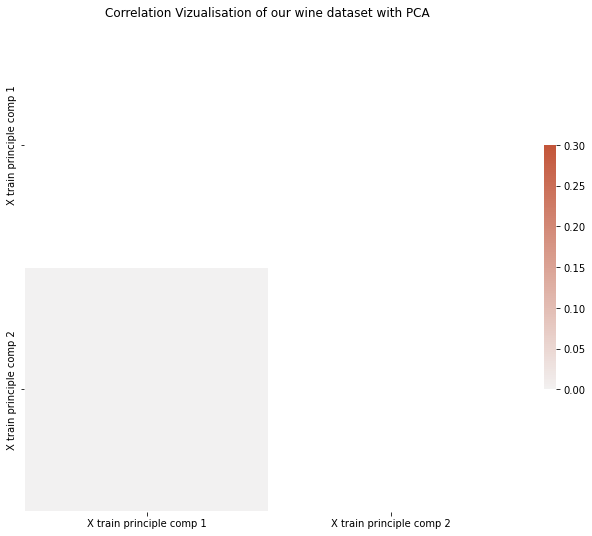

In [116]:
# Compute the correlation matrix
corr_2 = pc_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.title("Correlation Vizualisation of our wine dataset with PCA ")
plt.show()

# Final Report

## This is important so as:
1. As a form of documentation 
2. For personal referencing when revisiting your work

#  ---------------------- REPORT ----------------------

- The final visualization shows the columns have little to no corrilation
as columns with high correlation have all been combined into one output
- Our PCA analysis was successfull.